### 1. Import Dependencies

In [251]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

### 2. Data Loading

In [252]:
df = pd.read_csv('../Data/Processed/Telco_Churn_Data_Quality_Issues_Handled.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_new_customer
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


### 3. Visualize Class Distribution

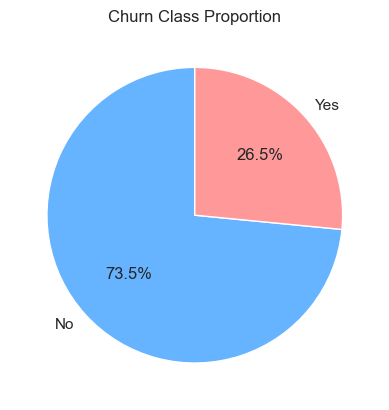

In [253]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#66b3ff','#ff9999'])
plt.title("Churn Class Proportion")
plt.ylabel('')
plt.show()


### 4. Class Imbalance Ratio

In [254]:
churn_counts = df['Churn'].value_counts(normalize=True)
print(churn_counts)

imbalance_ratio = churn_counts.max() / churn_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64
Imbalance Ratio: 2.77


The dataset shows a class imbalance where around 73% of customers did not churn, and only 27% did. This imbalance could lead machine learning models to favor the majority class (non-churners), resulting in high accuracy but poor sensitivity for detecting churn. Thus, relying on accuracy alone can be misleading, and metrics like precision, recall, F1-score, or AUC are more appropriate.

### 5. Analyze Churn Patterns across different Customer Segments

#### 5.1 Contract type segments Vs. Churn

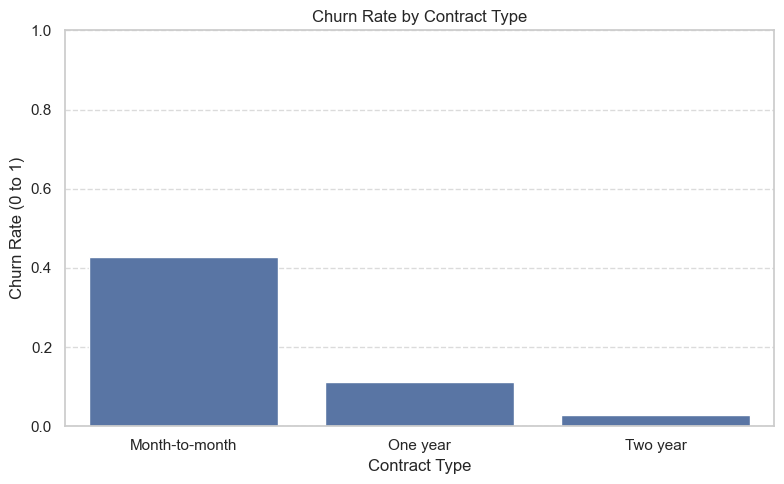

In [255]:

# Ensure Churn is encoded as 0 and 1 if not already
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Group by contract type and calculate churn rate
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
contract_churn.columns = ['Contract Type', 'Churn Rate']

# Sort by churn rate (optional)
contract_churn = contract_churn.sort_values(by='Churn Rate', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=contract_churn, x='Contract Type', y='Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.ylim(0, 1)
plt.ylabel('Churn Rate (0 to 1)')
plt.xlabel('Contract Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("")


Analysis of the churn rate across different contract types reveals a clear inverse relationship between contract length and customer attrition. Customers on month-to-month contracts exhibit the highest churn rate, indicating a lower level of commitment and a higher likelihood of switching providers. In contrast, those with one-year and especially two-year contracts are significantly less likely to churn. This suggests that longer-term contracts contribute to customer retention, likely due to increased perceived value, service satisfaction, or contractual obligations. These findings highlight the importance of promoting longer-term plans as a strategy to reduce churn and improve customer lifetime value.

### 5.2 Tenure group Vs. Churn

In [256]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [257]:
def tenure_segment(months):
    if months < 12:
        return 'New'
    elif 12 <= months <= 24:
        return 'Mid'
    else:
        return 'Loyal'
    
df['TenureSegment'] = df['tenure'].apply(tenure_segment)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_new_customer,TenureSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,New
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,Loyal
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,New
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,Loyal
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,New


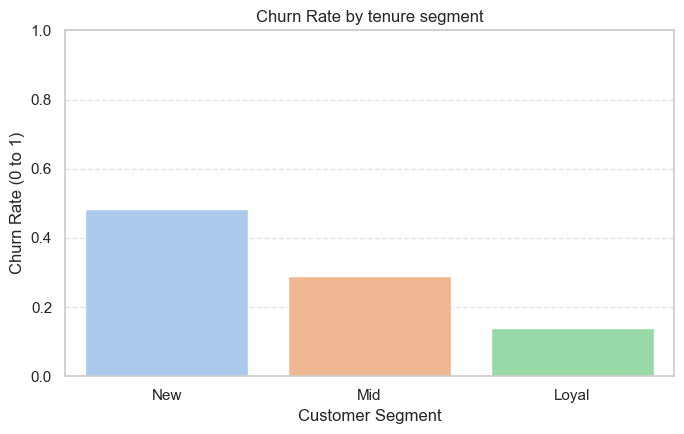

In [258]:
# Group by segment and calculate churn rate
segment_churn = df.groupby('TenureSegment')['Churn'].mean().reset_index()
segment_churn.columns = ['tenure segment', 'Churn Rate']
segment_churn = segment_churn.sort_values(by='Churn Rate', ascending=False)

# Plot
plt.figure(figsize=(7, 4.5))
sns.barplot(data=segment_churn, x='tenure segment', y='Churn Rate', palette='pastel')
plt.title('Churn Rate by tenure segment')
plt.ylim(0, 1)
plt.ylabel('Churn Rate (0 to 1)')
plt.xlabel('Customer Segment')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

When segmenting customers based on their tenure  classified as New (0–12 months), Mid (13–24 months), and Loyal (25+ months) a clear trend emerges: the churn rate steadily decreases as customer tenure increases. New customers exhibit the highest churn rate, likely due to lower switching costs and weaker engagement. In contrast, loyal customers who have been with the company longer are significantly less likely to churn, suggesting stronger brand commitment or satisfaction over time. This pattern highlights the importance of early retention strategies, particularly in the first year of customer engagement.

#### 5.3 Service Usage Segments Vs. Churn

In [259]:
services = ['InternetService', 'PhoneService', 'StreamingTV', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'StreamingMovies', 'TechSupport', 'MultipleLines'
            ]

for service in services:
    print(f"unique values in {service} column : {df[service].unique()}")


unique values in InternetService column : ['DSL' 'Fiber optic' 'No']
unique values in PhoneService column : ['No' 'Yes']
unique values in StreamingTV column : ['No' 'Yes' 'No internet service']
unique values in OnlineSecurity column : ['No' 'Yes' 'No internet service']
unique values in OnlineBackup column : ['Yes' 'No' 'No internet service']
unique values in DeviceProtection column : ['No' 'Yes' 'No internet service']
unique values in StreamingMovies column : ['No' 'Yes' 'No internet service']
unique values in TechSupport column : ['No' 'Yes' 'No internet service']
unique values in MultipleLines column : ['No phone service' 'No' 'Yes']


In [260]:
# Select customers with 'No internet service'
no_internet_customers = df[df['InternetService'] == 'No']

# Check how many of them have at least one advanced service marked as 'Yes'
internet_dependent_services = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
                            ]

# Count customers with at least one of these services marked as 'Yes'
mask = no_internet_customers[internet_dependent_services] == 'Yes'
addon_with_no_internet = mask.any(axis=1)

# Result: number and percentage
count = addon_with_no_internet.sum()
print(f"Number of customers with add-ons but no internet: {count}")
print(f"Percentage: {100 * count / len(no_internet_customers):.2f}%")


Number of customers with add-ons but no internet: 0
Percentage: 0.00%


#### Customer Service Usage Classification

To meaningfully segment customers based on their service adoption, we define two primary categories:

- **Light Users**: Customers who subscribe to **only the basic services**, namely **Phone Service**, **Internet Service**, or **both**, without any additional features.

- **Heavy Users**: Customers who use **at least one advanced or add-on service**—such as `StreamingTV`, `StreamingMovies`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, or `MultipleLines`—in addition to a basic service.

During validation, we observed that **all heavy users have Internet Service**, even if they do not use Phone Service. This confirms that **Internet Service is a prerequisite** for accessing advanced features, whereas Phone Service is optional. 

Additionally, we found **602 customers** who do not use Phone Service but have Internet Service and one or more advanced services—validating their classification as heavy users.

This classification helps us structure more insightful segmentation and churn analysis based on service engagement levels.


In [261]:
# List of add-on service columns
addon_services = [
    'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'MultipleLines'
]

# Define a function to classify users
def classify_service_usage(row):
    has_internet = row['InternetService'] != 'No'
    has_phone = row['PhoneService'] == 'Yes'
    
    uses_addon = any(
        row[service] == 'Yes' for service in addon_services
    )
    
    if has_internet and uses_addon:
        return 'Heavy'
    else:
        return 'Light'

# Apply the function to create the new column
df['ServiceUsage'] = df.apply(classify_service_usage, axis=1)

# Check the value counts
print(df['ServiceUsage'].value_counts())


ServiceUsage
Heavy    5034
Light    2009
Name: count, dtype: int64


In [262]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_new_customer,TenureSegment,ServiceUsage
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,New,Heavy
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,Loyal,Heavy
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,New,Heavy
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0,Loyal,Heavy
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,New,Light
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0,New,Heavy
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,Mid,Heavy
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,New,Heavy
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,0,Loyal,Heavy
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,Loyal,Heavy


  ServiceUsage  ChurnRate
0        Heavy   0.300556
1        Light   0.177203


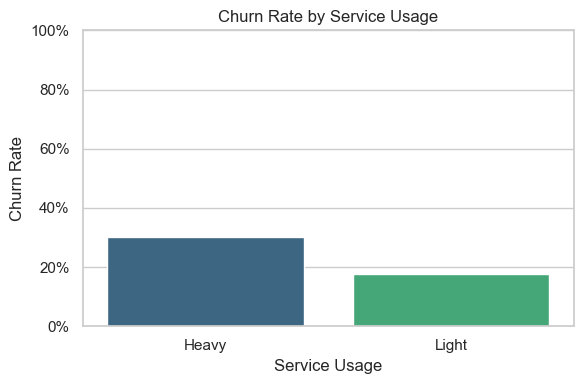

In [263]:
churn_rate = df.groupby('ServiceUsage')['Churn'].mean().reset_index()

# Rename columns for clarity
churn_rate.columns = ['ServiceUsage', 'ChurnRate']

print(churn_rate)
# Plot churn rate by service usage segment
plt.figure(figsize=(6, 4))
sns.barplot(data=churn_rate, x='ServiceUsage', y='ChurnRate', palette='viridis')

plt.title('Churn Rate by Service Usage')
plt.ylabel('Churn Rate')
plt.xlabel('Service Usage')
plt.ylim(0, 1)
plt.gca().set_yticklabels(['{:.0%}'.format(x) for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

#### `Insights: Churn Behavior by Service Usage Segment`

We segmented customers into two categories based on their service usage:

- **Light users**: Customers who subscribe only to one or both basic services — Phone and/or Internet — without any additional services.
- **Heavy users**: Customers who use one or more advanced (value-added) services in addition to basic services.

#### `Observed Churn Rates`

| Service Usage | Churn Rate |
|---------------|------------|
| Heavy         | **30.06%** |
| Light         | **17.72%** |

#### `Interpretation`

Contrary to typical expectations, **heavy users show a significantly higher churn rate** than light users. This reveals several possible insights:

1. **Higher Expectations & Complexity**  
   Heavy users rely on multiple services, which increases the chances of dissatisfaction due to service complexity, integration issues, or performance failures.

2. **Cost Sensitivity**  
   These users typically incur higher monthly bills. Without perceived value, they may find the service not worth the cost and leave.

3. **More Flexibility to Switch**  
   Heavy users might be more tech-savvy or contractually flexible (e.g., on month-to-month plans), making it easier for them to switch to a competitor.

4. **Lack of Targeted Retention**  
   The company might focus retention strategies on newer or lighter users and overlook loyal but complex heavy users.

5. **Service Overlap with Competitors**  
   Heavy users may compare services more actively and churn when they find better bundled offers elsewhere.

---

#### `Recommendations`

To reduce churn among heavy users and improve customer satisfaction:

1. **Optimize Service Quality**  
   Continuously monitor and improve the quality and integration of advanced services like streaming, backup, and security.

2. **Offer Bundled Discounts**  
   Create cost-effective bundled plans to reduce the financial burden and improve perceived value.

3. **Launch Loyalty Programs**  
   Provide perks or incentives to reward loyalty, such as discounts after a certain tenure or exclusive content.

4. **Improve Customer Support for Heavy Users**  
   Give priority support or account managers to high-value (heavy) customers to reduce frustration and churn.

5. **Collect Feedback Proactively**  
   Conduct regular satisfaction surveys or interviews specifically targeting heavy users to understand and address their unique pain points.

6. **Create Targeted Retention Campaigns**  
   Identify heavy users at risk of churn and engage them through personalized retention offers or service enhancements.

---


#### 5.4 Charges Vs. Churn

##### Visualize MonthlyCharges and TotalCharges

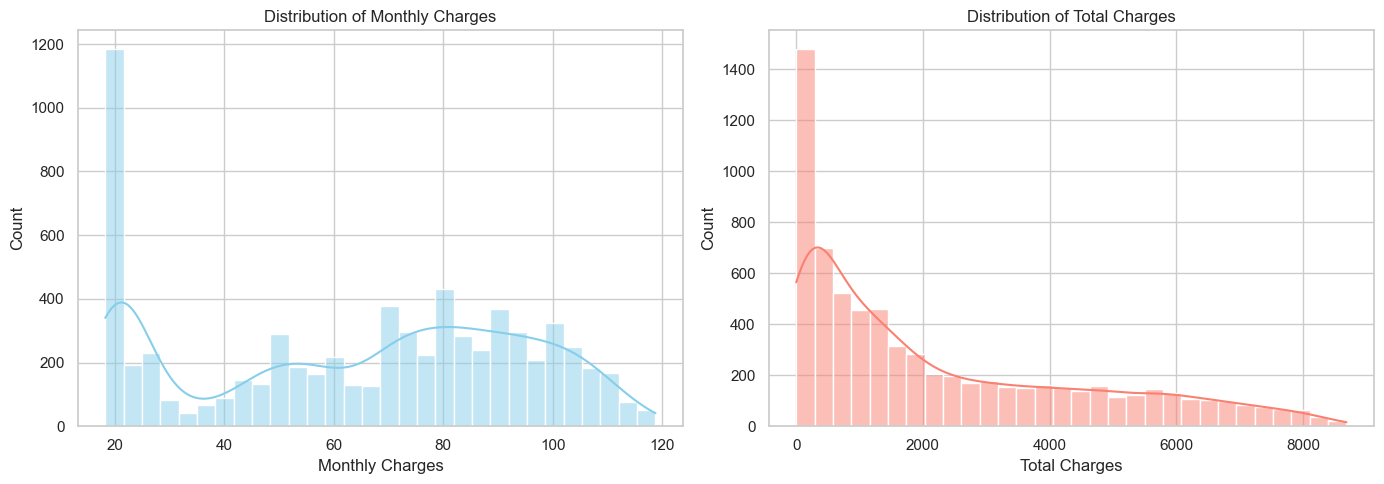

In [264]:

sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MonthlyCharges histogram
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Monthly Charges')
axes[0].set_xlabel('Monthly Charges')

# TotalCharges histogram (removing missing or invalid entries if any)
sns.histplot(df['TotalCharges'].dropna(), bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Total Charges')
axes[1].set_xlabel('Total Charges')

plt.tight_layout()
plt.show()


#### Distribution Insights: Monthly and Total Charges

To understand customer billing behavior, we analyzed the distributions of `MonthlyCharges` and `TotalCharges`. Here's what we found:

#### Monthly Charges
- **Bimodal Distribution**: Two distinct peaks are visible — one around **$20** and another around **$80**.
- **Interpretation**: This suggests that customers tend to fall into two primary billing categories:
  - Lower-end plans or fewer services (e.g., internet only).
  - Higher-tier plans or multiple services (e.g., internet + phone + addons).

#### Total Charges
- **Right-Skewed Distribution**: Majority of customers have relatively low total charges, while a small group has very high values.
- **Interpretation**: This is expected due to variability in customer tenure — longer-tenured customers have naturally accumulated higher total charges.

#### Implication for Segmentation
- Because both features show **non-normal distributions**, particularly with skewness and multimodal behavior, using **median values** instead of means is more appropriate to avoid the influence of outliers.
- However, since **`TotalCharges` is heavily affected by tenure**, we chose to segment customers based **only on `MonthlyCharges`**, which better reflects the **current billing pressure** a customer experiences.
- This approach gives us a clearer view of how **present billing levels relate to churn behavior**.


  BillingLevel  ChurnRate
0         High   0.351920
1          Low   0.179138


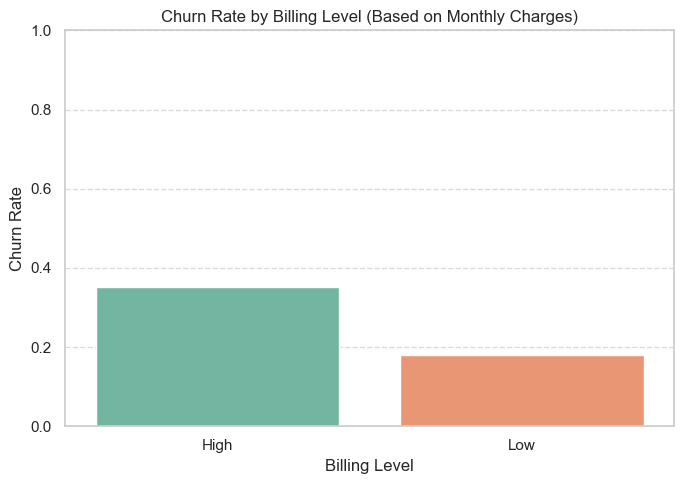

In [265]:
# Create the billing level feature based on MonthlyCharges median
monthly_median = df['MonthlyCharges'].median()
df['BillingLevel'] = df['MonthlyCharges'].apply(lambda x: 'High' if x > monthly_median else 'Low')

# Calculate churn rate by BillingLevel
billing_churn = df.groupby('BillingLevel')['Churn'].mean().reset_index()
billing_churn.columns = ['BillingLevel', 'ChurnRate']

print(billing_churn)
# Plot churn rates
plt.figure(figsize=(7, 5))
sns.barplot(data=billing_churn, x='BillingLevel', y='ChurnRate', palette='Set2')
plt.title('Churn Rate by Billing Level (Based on Monthly Charges)')
plt.ylabel('Churn Rate')
plt.xlabel('Billing Level')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Churn Rate by Billing Level

The churn rate analysis reveals a clear difference between the billing groups:

- Customers categorized as **High Billing** (with monthly charges above the median) have a **churn rate of approximately 35.2%**.
- Customers in the **Low Billing** group (with monthly charges below the median) show a significantly lower churn rate of about **17.9%**.

This indicates that customers facing higher monthly bills are almost twice as likely to churn compared to those with lower bills. This insight suggests that pricing and perceived value play critical roles in customer retention.

**Recommendation:**  
Targeted retention strategies such as personalized discounts, flexible payment options, or value-added services should be prioritized for the high billing segment to reduce churn risk and improve customer loyalty.


#### 5.5 Billing Level + Tenure Segmnet Vs. Churn 

In [266]:
df['BillingTenureSegment'] = df['BillingLevel'] + '-' + df['TenureSegment']
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,is_new_customer,TenureSegment,ServiceUsage,BillingLevel,BillingTenureSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,0,0,New,Heavy,Low,Low-New
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,0,0,Loyal,Heavy,Low,Low-Loyal
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,1,0,New,Heavy,Low,Low-New
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,0,Loyal,Heavy,Low,Low-Loyal
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,1,0,New,Light,High,High-New


   BillingTenureSegment  Churn  ChurnRate
1            High-Loyal      1   0.202892
3              High-Mid      1   0.468330
4              High-New      1   0.696543
7             Low-Loyal      1   0.054938
9               Low-Mid      1   0.141935
11              Low-New      1   0.353261


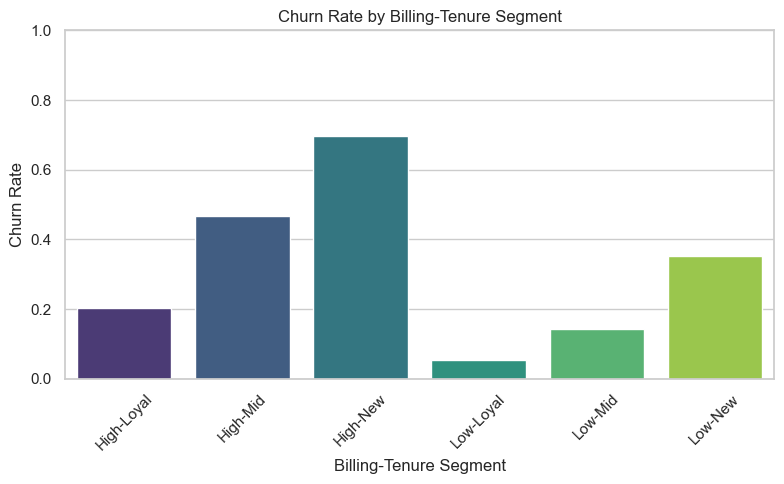

In [267]:
churn_rates = (
    df.groupby('BillingTenureSegment')['Churn']
    .value_counts(normalize=True)
    .rename('ChurnRate')
    .reset_index()
    .query('Churn == 1')
)
print(churn_rates)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=churn_rates,
    x='BillingTenureSegment',
    y='ChurnRate',
    palette='viridis'
)
plt.title('Churn Rate by Billing-Tenure Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Billing-Tenure Segment')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


### Business Insights: BillingTenureSegment & Churn

1. **High-New customers churn the most**  
   → New high-paying users are leaving early. Likely due to unmet expectations or onboarding gaps.  
   *Improve onboarding and early engagement for premium users.*

2. **High-Mid customers also at risk**  
   → After initial excitement, mid-tenure premium users may lose interest.  
   *Introduce mid-cycle value nudges like feedback loops or loyalty rewards.*

3. **Low-Loyal customers show strong retention**  
   → Despite lower spend, they’re consistently loyal.  
   *Study their behavior to scale loyalty strategies and identify upsell potential.*

4. **Low-New and Low-Mid churn moderately**  
   → Early-stage, low-paying users are uncertain but not as volatile as premium ones.  
   *Use light-touch engagement (e.g., personalized tips, check-ins) to retain.*

5. **Billing alone isn’t enough**  
   → Tenure is a critical context. High spenders aren’t always loyal.  
   *Use both billing and tenure to drive retention actions.*


#### 5.6 Service Engagement + BillingLevel Vs Churn Analysis

In [268]:
# Total engement list
engagement_features = [ 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
                      ]

engagement_map = {
                    'Yes': 1,
                    'No': 0,
                    'No phone service': 0,
                    'No internet service': 0,
                    'DSL': 1,
                    'Fiber optic': 1
                }

# Calculate engagement score 
df['EngagementScore'] = df[engagement_features].replace(engagement_map).sum(axis=1)

# Separate the engagement score into 3 bins
def bin_engagement(score):
    if score <= 3:
        return 'LowEngage'
    elif score <= 6:
        return 'MidEngage'
    else:
        return 'HighEngage'

df['EngagementSegment'] = df['EngagementScore'].apply(bin_engagement)

# Create the final BillingEngagement Segment 
df['BillingEngageSegment'] = df['BillingLevel'].str.replace(' ', '') + '-' + df['EngagementSegment']





In [269]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,is_new_customer,TenureSegment,ServiceUsage,BillingLevel,BillingTenureSegment,EngagementScore,EngagementSegment,BillingEngageSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,0,0,New,Heavy,Low,Low-New,2,LowEngage,Low-LowEngage
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1889.50,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,108.15,1,0,New,Heavy,Low,Low-New,4,MidEngage,Low-MidEngage
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1840.75,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,151.65,1,0,New,Light,High,High-New,2,LowEngage,High-LowEngage


#### Visualize With the Churn to Analyze patterns

   BillingEngageSegment  Churn  ChurnRate
1       High-HighEngage      1   0.170830
2        High-LowEngage      1   0.592445
5        High-MidEngage      1   0.410503
8         Low-LowEngage      1   0.197080
10        Low-MidEngage      1   0.142578


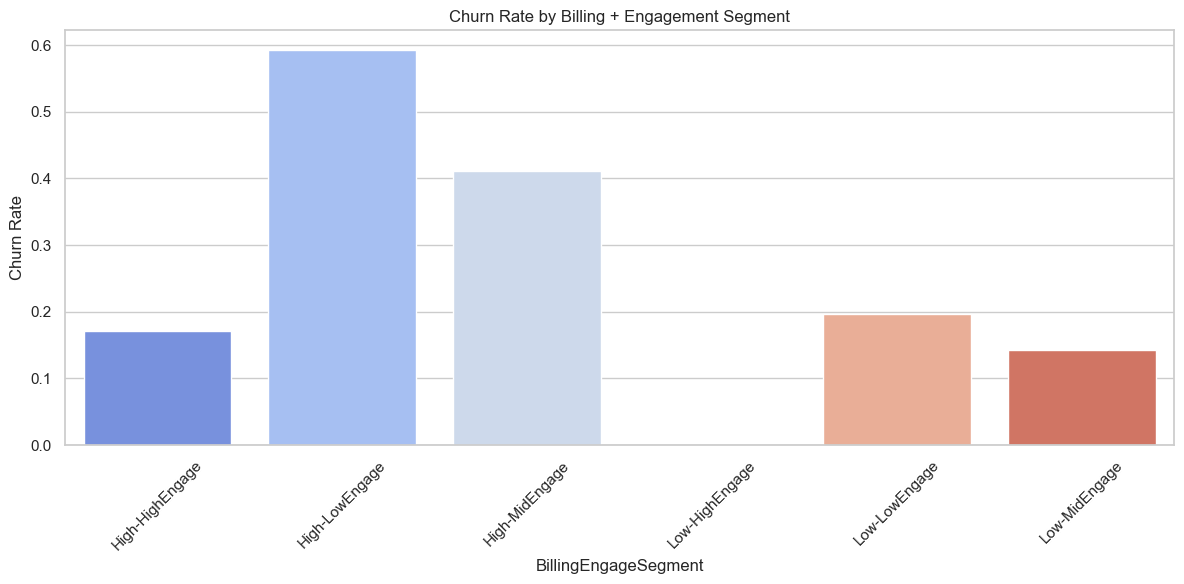

In [270]:
# Calculate churn rates for each segment
churn_rates = (
    df.groupby('BillingEngageSegment')['Churn']
    .value_counts(normalize=True)
    .rename('ChurnRate')
    .reset_index()
    .query('Churn == 1')  
)

print(churn_rates)

# define custom logical order
segment_order = sorted(df['BillingEngageSegment'].unique())
churn_rates['BillingEngageSegment'] = pd.Categorical(
    churn_rates['BillingEngageSegment'], categories=segment_order, ordered=True
)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    data=churn_rates,
    x='BillingEngageSegment',
    y='ChurnRate',
    palette='coolwarm'
)
plt.xticks(rotation=45)
plt.title('Churn Rate by Billing + Engagement Segment')
plt.ylabel('Churn Rate')
plt.xlabel('BillingEngageSegment')
plt.tight_layout()
plt.show()


#### Churn Analysis by Billing Level and Engagement Score

We created a combined segmentation of customers based on:
- **Billing Level**: High or Low (based on MonthlyCharges).
- **Engagement Level**: Low, Mid, High (based on the number of active services used by the customer, out of 9 possible).

This led to segments like `High-HighEngage`, `Low-MidEngage`, etc.

#### Key Insights

| Segment            | Churn Rate | Insight |
|--------------------|------------|---------|
| **High-LowEngage** | **59.2%**  | Extremely high churn among high-paying but low-engaged users. Indicates dissatisfaction or perceived lack of value. |
| **High-MidEngage** | 41.1%      | Moderate risk. These users engage with some services, but may not see full value. |
| **High-HighEngage**| 17.1%      | Healthy retention. High payers with strong engagement churn the least among high-paying users. |
| **Low-LowEngage**  | 19.7%      | Some churn, but relatively stable. Likely low-value, low-risk segment. |
| **Low-MidEngage**  | **14.3%**  | Lowest churn overall. A sweet spot of affordability and moderate engagement. |
| **Low-HighEngage** | **0.0%**   | No churn observed. Highly engaged, low-billing users are the most loyal segment.

> **Note**: The absence of `Low-HighEngage` in the original filtered result was due to 0 churns — not missing data.

---

#### Recommendations

- **Target High-LowEngage segment** with engagement-boosting campaigns or service bundling to reduce churn.
- **Upsell Low-HighEngage users**, as they are loyal and highly engaged — strong candidates for premium offerings.
- **Monitor High-MidEngage users** and explore what prevents full engagement.
- **Preserve Low-MidEngage loyalty** with affordable service bundles or loyalty programs.


#### 5.7 Service Engagement with Tenure Vs. Churn Rate

In [271]:
df['TenureSegment'].unique()

array(['New', 'Loyal', 'Mid'], dtype=object)

   TenureEngageSegment  Churn  ChurnRate
1     Loyal-HighEngage      1   0.144068
3      Loyal-LowEngage      1   0.065010
5      Loyal-MidEngage      1   0.186683
7       Mid-HighEngage      1   0.382353
9        Mid-LowEngage      1   0.172745
11       Mid-MidEngage      1   0.391304
12      New-HighEngage      1   0.516129
15       New-LowEngage      1   0.446505
16       New-MidEngage      1   0.561321


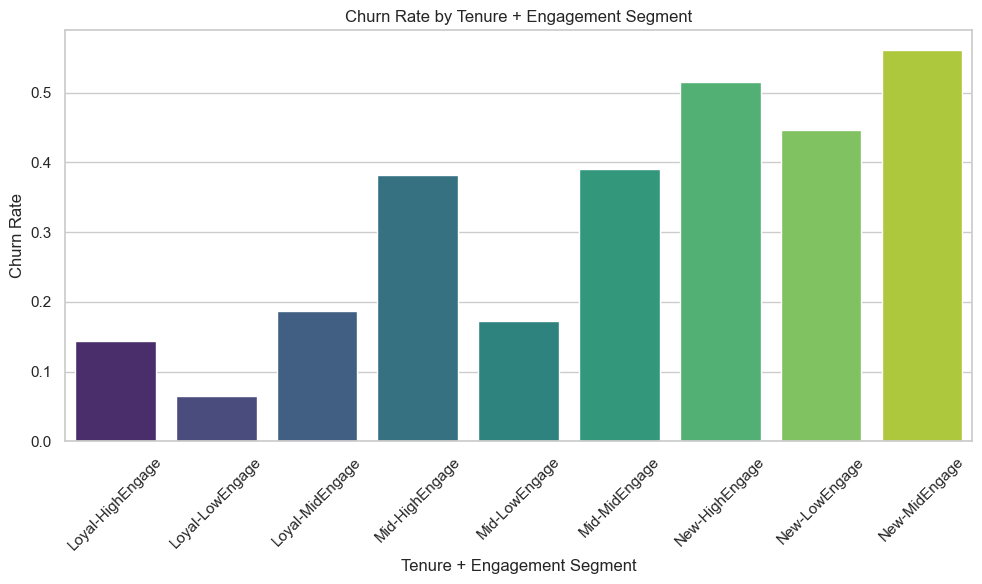

In [272]:
# Combine Tenure and Engagement segments and create new feature
df['TenureEngageSegment'] = df['TenureSegment'] + '-' + df['EngagementSegment']

tenure_engage_churn = (
    df.groupby('TenureEngageSegment')['Churn']
    .value_counts(normalize=True)
    .rename('ChurnRate')
    .reset_index()
    .query('Churn == 1')
)

print(tenure_engage_churn)

# Visualize using barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tenure_engage_churn,
    x='TenureEngageSegment',
    y='ChurnRate',
    palette='viridis'
)
plt.title('Churn Rate by Tenure + Engagement Segment')
plt.ylabel('Churn Rate')
plt.xlabel('Tenure + Engagement Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




#### Key Insights: Engagement × Tenure

- **Loyal customers** (high tenure) show consistently **low churn**, especially when engagement is high.
- **New customers** have **high churn** even if they are highly engaged — suggesting that early churn is influenced more by onboarding experience or initial dissatisfaction than by service usage.
- **Mid-tenure customers** show **inconsistent churn behavior**, indicating a possible transition phase where other latent factors may affect decisions.
- Engagement **alone** is not a universal churn reducer — its effect depends strongly on the tenure group.

---

#### Non-Linearity Observed

- The relationship between **engagement and churn is non-linear** and **tenure-dependent**.
    - For example, high engagement reduces churn **only** for `Loyal` customers.
    - For `New` customers, engagement has **no clear protective effect** against churn.
- This interaction cannot be captured by a simple linear model — modeling them as a **combined categorical feature (`TenureEngageSegment`)** captures these non-linearities more effectively and improves interpretability.


In [273]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Churn,is_new_customer,TenureSegment,ServiceUsage,BillingLevel,BillingTenureSegment,EngagementScore,EngagementSegment,BillingEngageSegment,TenureEngageSegment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,New,Heavy,Low,Low-New,2,LowEngage,Low-LowEngage,New-LowEngage
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,1,0,New,Heavy,Low,Low-New,4,MidEngage,Low-MidEngage,New-MidEngage
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,Loyal,Heavy,Low,Low-Loyal,4,MidEngage,Low-MidEngage,Loyal-MidEngage
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,1,0,New,Light,High,High-New,2,LowEngage,High-LowEngage,New-LowEngage


### 6. Business Context: Why Class Imbalance Matters in Churn Prediction



In the Telco churn dataset, the majority of customers **do not churn**, resulting in an imbalanced dataset where the **churn class is the minority**. This imbalance poses key challenges for model development and business decision-making:

- **Model Bias:** Standard models may become biased toward predicting the majority class (non-churn), leading to high overall accuracy but poor detection of actual churners.
- **Costly Mistakes:** Missing churners (false negatives) can lead to lost revenue and missed retention opportunities, which often cost more than mistakenly targeting non-churners (false positives).
- **Evaluation Metrics:** Accuracy alone becomes misleading; metrics like **Precision, Recall, and F1-score** better reflect the model’s ability to identify churners effectively.
- **Business Impact:** Properly addressing class imbalance ensures that retention campaigns focus on the right customers, optimizing marketing spend and improving customer lifetime value.

Understanding and managing class imbalance is thus critical to building reliable churn prediction models that align with business goals.


In [275]:
df.to_csv('../Data/Processed/Telco_Churn_Class_Imbalance_Analized.csv')